## Задание 1 **Опишите задачу с точки зрения NLP. Что это за задача, какие классические методы существуют для ее решения? Как ее можно решать через LLM? Как обычно оценивают качество моделей в этой задаче?**

Перед нами задача извлечения сущностей из текста (NER). Цель — классифицировать упоминаемые в тексте сущности в заранее определённые категории: PER (персона), ORG (организация), LOC (локация), EVT (событие), PRO (продукт). Классическими методами решения данной задачи являются регулярные выражения,
методы классического машинного обучения (например, градиентный бустинг), RNN, предобученные эмбеддинги (например, Word2Vec), BERT, GPT, LLM. Чтобы решить задачу NER через LLM, необходимо написать модели промпт, содержащий текст и задачу «Извлечь сущности PER, ORG, LOC, EVT, PRO». Качество моделей в NER измеряется с помощью микро- или макроусредненной F-меры (среднего гармонического между precision и recall).

## Задание 2**Реализуйте чтение датасета в pandas DataFrame с обязательными колонками "document_id", "document_text", "entity", "gold_answer". Выведите шапку датафрейма.**


In [1]:
import os
import pandas as pd

raw_directory_path = r'.\sample_pl_cs_ru_bg\raw\ru'
annotated_directory_path = r'.\sample_pl_cs_ru_bg\annotated\ru'

documents = {'document_id': [], 'document_text': [], 'entity': None, 'gold_answer': []}

for filename in os.listdir(raw_directory_path):
    file_path = os.path.join(raw_directory_path, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        document_id = lines[0].strip()
        document_text = ''.join(lines[4:]).strip()
        documents['document_id'].append(document_id)
        documents['document_text'].append(document_text)

        annotation_path = os.path.join(annotated_directory_path, filename[:-3] + 'out')
        with open(annotation_path, 'r', encoding='utf-8') as annotation_file:
            gold_answer = annotation_file.readlines()[1:]
            documents['gold_answer'].append([line.strip() for line in gold_answer])

df = pd.DataFrame(documents)

In [2]:
df.head(10)

,document_id,document_text,entity,gold_answer
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,None,"[Brexit\tBrexit\tEVT\tEVT-Brexit, Альбиона\tАл..."
1,ru-1000,Подробности.ua: Третий за сутки: Борис Джонсон...,None,"[Brexit\tBrexit\tEVT\tEVT-Brexit, The Guardian..."
2,ru-1001,Глава МИД Британии Борис Джонсон подал в отста...,None,[Associated Press\t\tORG\tORG-The-Associated-P...
3,ru-1002,09.07.2018 18:09 : Премьер-министр Великобрита...,None,[Бориса Джонсона\tБорис Джонсон\tPER\tPER-Bori...
4,ru-1003,09.07.2018 17:02 : Министр иностранных дел Вел...,None,[Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-...
5,ru-1004,Борис Джонсон ушел в отставку с поста главы МИ...,None,"[Brexit\t\tEVT\tEVT-Brexit, Борис Джонсон\t\tP..."
6,ru-1006,Захарова лирически прокомментировала отставку ...,None,"[Brexit\tBrexit\tEVT\tEVT-Brexit, Facebook\tFa..."
7,ru-1011,За Борисом Джонсоном последует сама Мэй - брит...,None,"[Brexit\tBrexit\tEVT\tEVT-Brexit, The Guardian..."
8,ru-1017,Борис Джонсон подал в отставку с поста министр...,None,"[Brexit\tBrexit\tEVT\tEVT-Brexit, The Guardian..."


## Задание 3  
**Напишите функцию, которая принимает на вход строку датафрейма и выдает текст входного сообщения для LLM**


In [3]:
def generate_prompt(row):
    prompt = (
        f"Документ ID: {row['document_id']}\n"
        f"Текст документа:\n{row['document_text']}\n\n"
        "Задача: Определите сущности в тексте и их типы. Типы сущностей: "
        "PER (персона), ORG (организация), LOC (локация), EVT (событие), PRO (продукт).\n"
        "['оригинальный текст\\tнормализованный текст\\tтип сущности\\tуникальный идентификатор']\n"
        "Список типов сущностей:\n"
        "- PER (персона)\n"
        "- ORG (организация)\n"
        "- LOC (локация)\n"
        "- EVT (событие)\n"
        "- PRO (продукт)\n\n"
        "Пример ожидаемого вывода:\n"
        "['Борис Джонсон\\tБорис Джонсон\\tPER\\tPER-Boris-Johnson',\n"
        " 'Великобритании\\tВеликобритания\\tLOC\\tGPE-Great-Britain',\n"
        " 'Даунинг-Стрит\\tДаунинг-Стрит\\tLOC\\tLOC-Downing-Street',\n"
        " 'Джонсона\\tДжонсон\\tPER\\tPER-Boris-Johnson',\n"
        " 'Дэвид Дэвис\\tДэвид Дэвис\\tPER\\tPER-David-Davis',\n"
        " 'Евросоюза\\tЕвросоюз\\tORG\\tORG-European-Union',\n"
        " 'Мэй\\tМэй\\tPER\\tPER-Theresa-May',\n"
        " 'Рейтер\\tРейтер\\tORG\\tORG-Reuters',\n"
        " 'Тереза Мэй\\tТереза Мэй\\tPER\\tPER-Theresa-May',\n"
        " 'брекзита\\tбрекзит\\tEVT\\tEVT-Brexit']"
    )
    # print(prompt)
    return prompt


# Пример применения функции
df['prompt'] = df.apply(generate_prompt, axis=1)
df[['document_id', 'prompt']].head()

,document_id,prompt
0,ru-10,Документ ID: ru-10\nТекст документа:\nТереза М...
1,ru-1000,Документ ID: ru-1000\nТекст документа:\nПодроб...
2,ru-1001,Документ ID: ru-1001\nТекст документа:\nГлава ...
3,ru-1002,Документ ID: ru-1002\nТекст документа:\n09.07....
4,ru-1003,Документ ID: ru-1003\nТекст документа:\n09.07....


## Задание 4  
**Получите ответы GigaChat для всех документов. Документов всего 9, поэтому сделать это можно вручную, пользуясь веб-интерфейсом GigaChat или ботом в ВК или Телеграме. Не очищайте историю сообщений, чтобы потом продемонстрировать подлинность ответов на онлайн-собеседовании.
Внесите ответы GigaChat в датафрейм, сохраните его.**

In [4]:
gigachat_answers = {
    "ru-10": [
        'Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'Британская конституция\tБританская конституция\tPRO\tPRO-British-Constitution', 
        'Мишель Барнье\tМишель Барнье\tPER\tPER-Michel-Barnier', 
        'Северная Ирландия\tСеверная Ирландия\tLOC\tLOC-Northern-Ireland', 
        'Европа\tЕвропа\tLOC\tLOC-Europe', 
        'Альбион\tАльбион\tLOC\tLOC-Albion', 
        'Себастьян Курц\tСебастьян Курц\tPER\tPER-Sebastian-Kurz', 
        'Австрийский канцлер\tАвстрийский канцлер\tPER\tPER-Austrian-Chancellor', 
        'Международный валютный фонд\tМеждународный валютный фонд\tORG\tORG-IMF', 
        'Ла-Манш\tЛа-Манш\tLOC\tLOC-English-Channel', 
        'Европейский Союз\tЕвропейский Союз\tORG\tORG-EU', 
        'Единый рынок ЕС\tЕдиный рынок ЕС\tPRO\tPRO-Single-Market', 
        'Единая Европа\tЕдиная Европа\tLOC\tLOC-United-Europe', 
        'Главы правительств ЕС\tГлавы правительств ЕС\tORG\tORG-EU-Leaders', 
        'Конференция Консервативной партии\tКонференция Консервативной партии\tEVT\tEVT-Tory-Conference', 
        'Оппозиционные британские лейбористы\tОппозиционные британские лейбористы\tORG\tORG-Labour-Opposition', 
        'Консерваторы\tКонсерваторы\tORG\tORG-Conservatives', 
        'Парламент Великобритании\tПарламент Великобритании\tORG\tORG-UK-Parliament', 
        'Brexit\tBrexit\tEVT\tEVT-Brexit'
    ],
    "ru-1000": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'министром иностранных дел Великобритании\tминистр иностранных дел Великобритании\tPER\tPER-Foreign-Secretary-of-the-UK', 
        'Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davis', 
        'заместитель министра по Brexit Стив Бейкер\tСтив Бейкер\tPER\tPER-Steve-Baker', 
        'Тереза Мэй\тТереза Мэй\tPER\tPER-Theresa-May', 
        'ЕС\tЕвропейский Союз\tORG\tORG-EU', 
        'The Guardian\tThe Guardian\tORG\tORG-The-Guardian', 
        'УНН\tУНН\tORG\tORG-UNN', 
        'парламента\tпарламент\tORG\tORG-parliament', 
        'отставка Бориса Джонсона\tотставка Бориса Джонсона\tEVT\tEVT-resignation-of-Boris-Johnson'
    ],
    "ru-1001": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'министер иностранных дел Великобритании\tминистр иностранных дел Великобритании\tPER\tPER-Foreign-Secretary-of-the-UK', 
        'Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'Associated Press\tAssociated Press\tORG\tORG-Associated-Press', 
        'канцелярия премьера\tканцелярия премьера\tORG\tORG-premier-office', 
        'Евросоюз\tЕвропейский Союз\tORG\tORG-EU', 
        'отставку Джонсона\tотставка Бориса Джонсона\tEVT\tEVT-resignation-of-Boris-Johnson'
    ],
    "ru-1002": [
        'Тереза Мей\tТереза Мей\tPER\tPER-Theresa-May', 
        'министра иностранных дел Бориса Джонсона\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'Великобритании\tВеликобритания\tLOC\tGPE-Great-Britain', 
        'министра по делам «Брекзит» Дэвида Дэвиса\tДэвид Дэвис\tPER\tPER-David-Davis', 
        '«Брекзит»\tБрекзит\tEVT\tEVT-Brexit'
    ],
    "ru-1003": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'агентство Рейтер\tРейтер\tORG\tORG-Reuters', 
        'премьер Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'Даунинг-Стрит\tДаунинг-Стрит\tLOC\tLOC-Downing-Street', 
        'министр по вопросам брекзита Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davis', 
        'выхода Великобритании из Евросоюза\tБрекзит\tEVT\tEVT-Brexit'
    ],
    "ru-1004": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'МИД Великобритании\tМинистерство иностранных дел Великобритании\tORG\tORG-Foreign-Office-of-the-UK', 
        'ТАСС\tТАСС\tORG\tORG-TASS', 
        'канцелярией премьер-министра страны Терезы Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'министра по вопросам Brexit Дэвида Дэвиса\tДэвид Дэвис\tPER\tPER-David-Davis', 
        'Евросоюзом\tЕвропейский Союз\tORG\tORG-EU', 
        'планом развития отношений с Евросоюзом после Brexit\tПлан развития отношений с ЕС после Brexit\tPRO\tPRO-post-Brexit-relations-plan', 
        'Германия\tГермания\tLOC\tLOC-Germany', 
        'Польши\tПольша\tLOC\tLOC-Poland', 
        'саммит по развитию региона Западных Балкан\tСаммит по развитию региона Западных Балкан\tEVT\tEVT-Western-Balkans-development-summit', 
        'Лондоне\tЛондон\tLOC\tLOC-London', 
        'Консервативную партию\tКонсервативная партия\tORG\tORG-Conservative-Party'
    ],
    "ru-1006": [
        'Мария Захарова\tМария Захарова\tPER\tPER-Maria-Zakharova', 
        'Facebook\tFacebook\tORG\tORG-Facebook', 
        'министра иностранных дел Великобритании Бориса Джонсона\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'правительства Т. Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'Британии\tВеликобритания\tLOC\tGPE-Great-Britain', 
        'Boris Johnson\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'Brexit\tBrexit\tEVT\tEVT-Brexit'
    ],
    "ru-1011": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'министра иностранных дел Великобритании\tминистр иностранных дел Великобритании\tPER\tPER-Foreign-Secretary-of-the-UK', 
        'премьер-министра Великобритании Терезы Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'Великобританию из ЕС\tБрекзит\tEVT\tEVT-Brexit', 
        'The Guardian\tThe Guardian\tORG\tORG-The-Guardian', 
        'Палату общин\tПалата общин\tORG\tORG-House-of-Commons', 
        'стратегию выхода страны из Евросоюза\tстратегия выхода из ЕС\tPRO\tPRO-Brexit-strategy', 
        'Дэвида Дэвиса\tДэвид Дэвис\tPER\tPER-David-Davis', 
        'ЕС\tЕвропейский Союз\tORG\tORG-European-Union'
    ],
    "ru-1017": [
        'Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-Johnson', 
        'пост министра иностранных дел Великобритании\tминистр иностранных дел Великобритании\tPER\tPER-Foreign-Secretary-of-the-UK', 
        'TThe Guardian\tThe Guardian\tORG\tORG-The-Guardian', 
        'УНН\tУНН\tORG\tORG-UNN', 
        'пресс-секретарь британского парламента\tПресс-секретарь британского парламента\tPER\tPER-UK-Parliament-Spokesperson', 
        'Дэвид Дэвис\tДэвид Дэвис\tPER\tPER-David-Davis', 
        'заместитель министра по Brexit Стив Бейкер\tСтив Бейкер\tPER\tPER-Steve-Baker', 
        'Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May', 
        'ЕС\tЕвропейский Союз\tORG\tORG-European-Union'
    ]    
}


In [5]:
df['entity'] = df['document_id'].map(gigachat_answers)

In [6]:
df.head()

,document_id,document_text,entity,gold_answer,prompt
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,"[Тереза Мэй\tТереза Мэй\tPER\tPER-Theresa-May,...","[Brexit\tBrexit\tEVT\tEVT-Brexit, Альбиона\tАл...",Документ ID: ru-10\nТекст документа:\nТереза М...
1,ru-1000,Подробности.ua: Третий за сутки: Борис Джонсон...,[Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-...,"[Brexit\tBrexit\tEVT\tEVT-Brexit, The Guardian...",Документ ID: ru-1000\nТекст документа:\nПодроб...
2,ru-1001,Глава МИД Британии Борис Джонсон подал в отста...,[Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-...,[Associated Press\t\tORG\tORG-The-Associated-P...,Документ ID: ru-1001\nТекст документа:\nГлава ...
3,ru-1002,09.07.2018 18:09 : Премьер-министр Великобрита...,"[Тереза Мей\tТереза Мей\tPER\tPER-Theresa-May,...",[Бориса Джонсона\tБорис Джонсон\tPER\tPER-Bori...,Документ ID: ru-1002\nТекст документа:\n09.07....
4,ru-1003,09.07.2018 17:02 : Министр иностранных дел Вел...,[Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-...,[Борис Джонсон\tБорис Джонсон\tPER\tPER-Boris-...,Документ ID: ru-1003\nТекст документа:\n09.07....


## Задание 5  
**Реализуйте самостоятельно алгоритм для подсчета метрик score_fn(gold: str, pred: str) → float. Можно пользоваться только библиотеками numpy, scipy, pandas. Напишите юнит-тесты. Возможно ли ускорить вычисление функции через векторную реализацию? Поясните решение и обоснуйте, почему выбрали именно такую метрику.**


In [7]:
import numpy as np

In [8]:
def score_fn(gold: str, pred: str) -> float:
    gold_entities = set(eval(gold))
    pred_entities = set(eval(pred))
    true_positive = len(gold_entities & pred_entities)
    precision = true_positive / len(pred_entities) if pred_entities else 0
    recall = true_positive / len(gold_entities) if gold_entities else 0
    if precision + recall == 0:
        return 0.
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1


In [9]:
def test_score_fn():
    assert np.isclose(score_fn("['A', 'B']", "['A', 'B']"), 1.0)
    assert np.isclose(score_fn("['A', 'B']", "['A']"), 2/3)
    assert np.isclose(score_fn("['A', 'B']", "['C']"), 0.0)
    assert np.isclose(score_fn("[]", "['A']"), 0.0)
    assert np.isclose(score_fn("['A']", "[]"), 0.0)


test_score_fn()

Здесь нет необходимости в векторной реализации, потому что здесь не используются циклы.  
В качестве метрики я выбрал F1-score, так как данная метрика учитывает как precision, так и recall.

## Задание 6  
**Вычислите метрики для каждой строки в датафрейме. Сагрегируйте результаты а) по каждой сущности, б) по каждому документу. Изобразите результаты на графиках. Какие выводы можно сделать?**

In [10]:
import matplotlib.pyplot as plt

In [11]:
df['f1_score'] = df.apply(lambda row: score_fn(str(row['gold_answer']), str(row['entity'])), axis=1)

In [12]:
def extract_entity_types(entities):
    entity_types = [entity.split('\t')[2].split('-')[0] for entity in entities] if entities else []
    return entity_types


df['pred_types'] = df['entity'].apply(extract_entity_types)

In [13]:
def aggregate_by_entity_type(df):
    type_scores = {}
    for index, types in df["pred_types"].items():
        for entity_type in types:
            if entity_type not in type_scores:
                type_scores[entity_type] = []
            type_scores[entity_type].append(df.loc[index, 'f1_score'])
    return {entity_type: np.mean(scores) for entity_type, scores in type_scores.items()}


f1_by_pred_type = aggregate_by_entity_type(df)

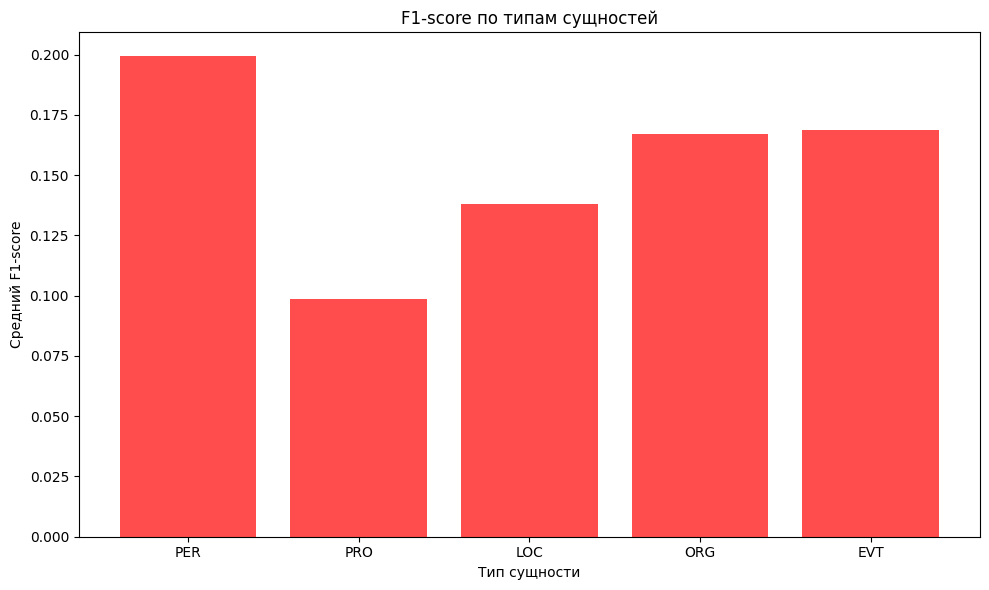

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(f1_by_pred_type.keys(), f1_by_pred_type.values(), color='red', alpha=0.7)
plt.xlabel('Тип сущности')
plt.ylabel('Средний F1-score')
plt.title('F1-score по типам сущностей')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Наилучшая метрика у сущности person, наихудшая у product

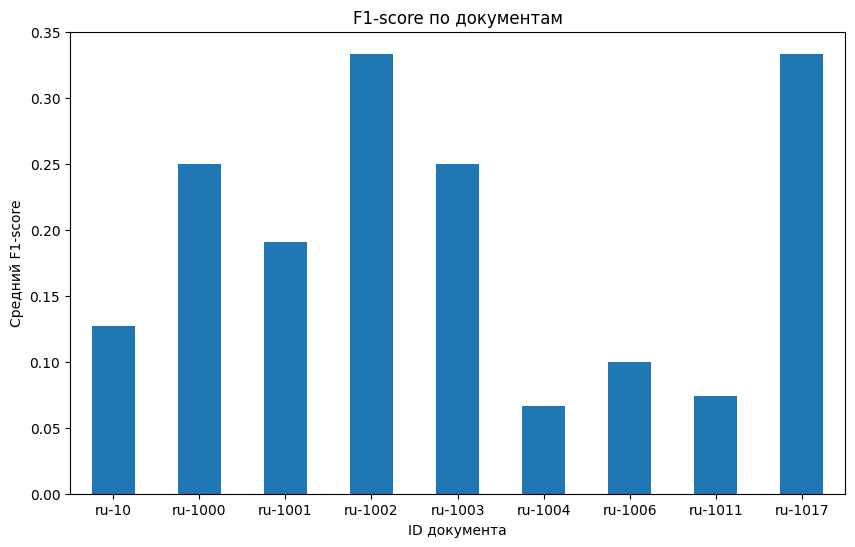

In [15]:
f1_by_document = df.groupby('document_id')['f1_score'].mean()

plt.figure(figsize=(10, 6))
f1_by_document.plot(kind='bar')
plt.xlabel('ID документа')
plt.ylabel('Средний F1-score')
plt.title('F1-score по документам')
plt.xticks(rotation=0)
plt.show()

У 1, 6-8 документов f1-score самый маленький, а у 4 и 9 наилучший. Предполагаю, что это может быть связано с количеством слов в каждом документе.

## Задание 7  
**Есть ли зависимость метрик от длины документа? Постройте графики, чтобы ответить на вопрос.**

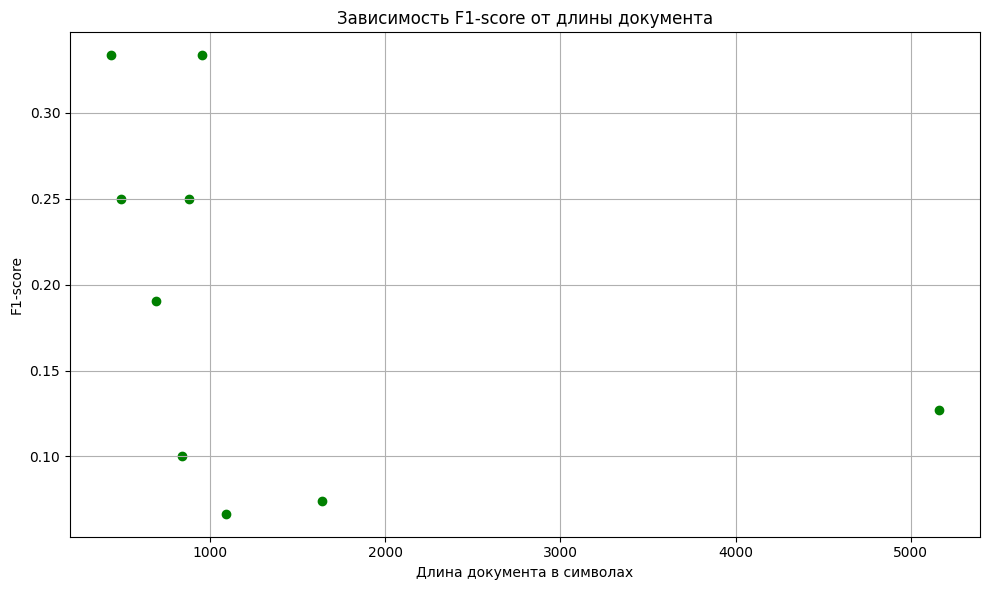

In [16]:
df['doc_len'] = df['document_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(df['doc_len'], df['f1_score'], color='green')
plt.title('Зависимость F1-score от длины документа')
plt.xlabel('Длина документа в символах')
plt.ylabel('F1-score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df[["f1_score", "doc_len"]].corr()

,f1_score,doc_len
f1_score,1.00000,-0.37365
doc_len,-0.37365,1.00000


По графику какой-то четкой зависимости определить нельзя, однако корреляция между двумя этими признаками есть, причём отрицательная

## Задание 8
**Проведите анализ ошибок. Когда модель чаще отвечает правильно, а когда ошибается? Предложите варианты, как повысить метрики.**

In [18]:
low_score_docs = df[df['f1_score'] < df['f1_score'].mean()]


def analyze_mismatches(gold, pred):
    gold_entities = set(gold)
    pred_entities = set(pred)
    
    missed = gold_entities - pred_entities
    false_positive = pred_entities - gold_entities
    return {"missed": missed, "false_positive": false_positive}


df['errors'] = df.apply(lambda row: analyze_mismatches(row['gold_answer'], row['entity']), axis=1)

In [19]:
def entity_type_analysis(errors):
    type_errors = {"missed": {}, "false_positive": {}}
    for error_type, entities in errors.items():
        for entity in entities:
            entity_type = entity.split('\t')[2].split('-')[0]
            if entity_type not in type_errors[error_type]:
                type_errors[error_type][entity_type] = 0
            type_errors[error_type][entity_type] += 1
    return type_errors


total_errors = {"missed": {}, "false_positive": {}}
for _, row in df.iterrows():
    doc_errors = entity_type_analysis(row['errors'])
    for error_type in total_errors:
        for entity_type, count in doc_errors[error_type].items():
            if entity_type not in total_errors[error_type]:
                total_errors[error_type][entity_type] = 0
            total_errors[error_type][entity_type] += count

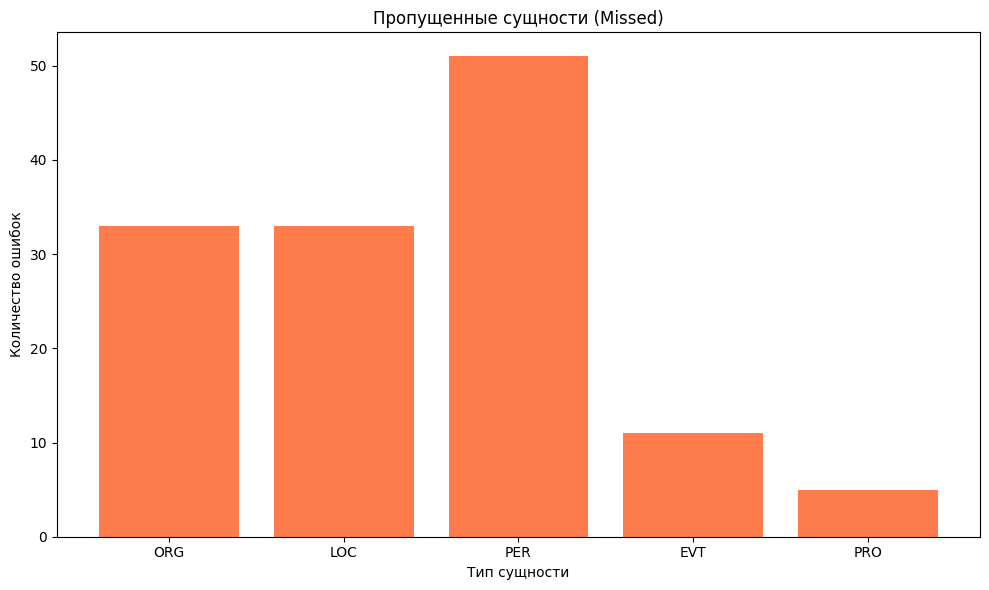

In [20]:
def plot_error_distribution(errors, title, color='red'):
    plt.figure(figsize=(10, 6))
    plt.bar(errors.keys(), errors.values(), color=color, alpha=0.7)
    plt.xlabel('Тип сущности')
    plt.ylabel('Количество ошибок')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_error_distribution(total_errors['missed'], 'Пропущенные сущности (Missed)', 'orangered')

Видим, что больше всего в абсолютном значении модель не извлекла сущности PER, ORG и LOC. Возможно, стоит в промпте явно обратить внимание на эти сущности, и тогда качество будет лучше.

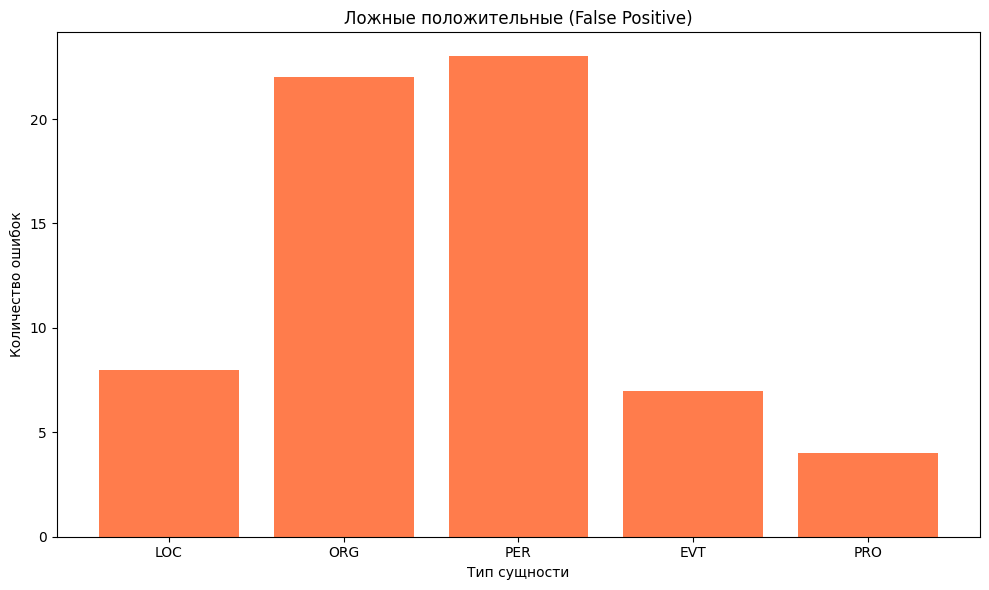

In [21]:
plot_error_distribution(total_errors['false_positive'], 'Ложные положительные (False Positive)', 'orangered')

Здесь вновь фигурируют PER и ORG. Предполагаю, что это связано с тем, что этих сущностей впринципе больше всего в текстах.

Теперь посмотрим на относительные ошибки

In [22]:
def count_entities_by_type(column):
    type_counts = {}
    for entities in column:
        for entity in entities:
            entity_type = entity.split('\t')[2].split('-')[0]  # Извлекаем тип сущности
            if entity_type not in type_counts:
                type_counts[entity_type] = 0
            type_counts[entity_type] += 1
    return type_counts


gold_entity_counts = count_entities_by_type(df['gold_answer'])

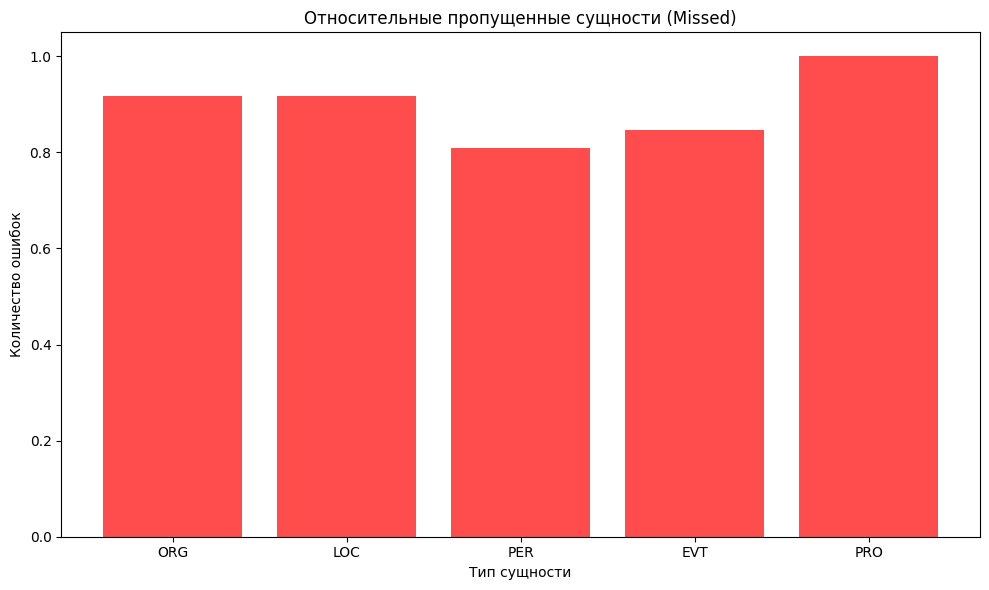

In [23]:
def calculate_relative_errors(total_errors, gold_counts):
    relative_errors = {}
    for entity_type, error_count in total_errors.items():
        total_gold = gold_counts.get(entity_type, 1)
        relative_errors[entity_type] = error_count / total_gold
    return relative_errors


total_errors = {"missed": {}, "false_positive": {}}
for _, row in df.iterrows():
    doc_errors = entity_type_analysis(row['errors'])
    for error_type in total_errors:
        for entity_type, count in doc_errors[error_type].items():
            if entity_type not in total_errors[error_type]:
                total_errors[error_type][entity_type] = 0
            total_errors[error_type][entity_type] += count


relative_missed_errors = calculate_relative_errors(total_errors['missed'], gold_entity_counts)
relative_false_positive_errors = calculate_relative_errors(total_errors['false_positive'], gold_entity_counts)

plot_error_distribution(relative_missed_errors, 'Относительные пропущенные сущности (Missed)')

Здесь картинка совсем другая. Распределение похоже на равномерное, что говорит нам о том, что модель примерно все сущности равновероятно пропускает. Наименьшее значение ошибки у PER.

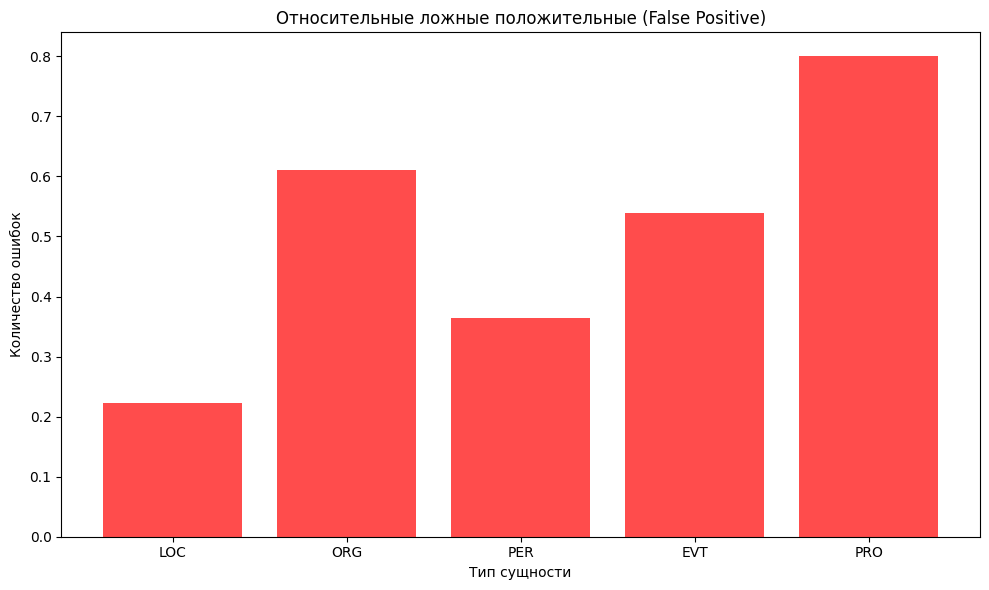

In [24]:
plot_error_distribution(relative_false_positive_errors, 'Относительные ложные положительные (False Positive)')

В относительных значениях наглядно видно, что модель чаще всего ложно извлекает PRO, ORG и EVT. Предположу, что это связано с редкостью появления этих сущностей относительно PER и LOC.  
Таким образом, я считаю, что в промпте нужно сделать чуть больший упор на сущности PRO, ORG и EVT, чтобы повысить качество метрик.

## Задание 9  
**Сделайте выводы по всему исследованию. Напишите, чему научились и что нового попробовали.**

Модель неплохо справляется с сущностями PER и ORG. С более редкими сущностями, например с EVT или PRO, модель справляется значительно хуже. Для решения этой проблемы стоит добавить больше разметки для этих сущностей и написать более детальный промпт. Также наблюдалась отрицательная корреляция между метрикой f1-score и длиной текста.

Для меня это был первый опыт работы с задачей NER и использованием LLM для её решения. Задача показалась мне очень интересной и необычной, я обязательно изучу её детальнее. 

In [25]:
df[['document_id', 'document_text', 'entity', 'gold_answer']].to_csv('predictions.csv')